In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
c = 3e8 #m/s velocidad de la luz
n_m = 1 # indice de refracción del medio
a = 250e-9 #m radio de la particula
lambda1 = 532e-9 #m longitud de onda del laser
n_p = 1.6 # indice de refraccion de la particula
m = n_p/n_m
sig = 128*(np.pi)**5*a**6*(m**2-1)**2/((3*lambda1**4)*(m**2+2)**2)
P = 300e-3 #W potencia
w0 = 20000e-9 #m ancho del haz
z_R = (np.pi*w0**2)/lambda1
I0 = 2*P/(np.pi*w0**2)
densidad = 2.65e3 #kg/m^3 densidad de la partícula
M = 4./3*np.pi*densidad*a**3 #Masa en kilogramos
d = 2 #metros (distancia hasta el foco del haz)
vi = 34.3 #m/s velocidad inicial

In [3]:
# Definiciones de funciones de intensidad y ancho del haz
z_R = (np.pi*w0**2)/lambda1

def w_z(z):
    return w0*np.sqrt(1+(z/z_R)**2)

def I(rho,z):
    return I0*(w0/w_z(z))**2*np.exp(-2*rho**2/w_z(z)**2) # intensidad W/m2

In [4]:
# fuerzas

# F(rho, z) = (F_scatt + F_grad_z)/M
def F(rho,z):
    Fscatt = -sig*n_p*I(rho,z)/c
    dIdz = 2*I(rho,z)*(z/z_R**2) *(w0/w_z(z))**2 * (2*rho**2/w_z(z)**2 - 1)
    Fgrad_z = 2*np.pi*n_m*a**3/c*((m**2-1)/(m**2+2)) * dIdz
    #Fgrad_z = 0
    return (Fscatt + Fgrad_z)/M

# G(rho, z) = F_grad_rho/M
def G(rho,z):
    Fgrad_rho = (-8*np.pi*n_m*a**3)/c * (rho/w_z(z)**2) * ((m**2-1)/(m**2+2))*I(rho,z)
    return Fgrad_rho/M

In [5]:
# Sistema de ecuaciones diferenciales
def sistema_diferencial(t, y):
    z, vz, rho, vrho = y

    # Ecuaciones de movimiento
    dzdt = vz
    dvzdt = F(rho, z)
    drhodt = vrho
    dvrhodt = G(rho, z)

    return [dzdt, dvzdt, drhodt, dvrhodt]

# Condiciones iniciales
z0 = -d
vz0 = vi
rho0 = 0
vrho0 = 0
y0 = [z0, vz0, rho0, vrho0]

# Tiempo de integración
t_span = (0,0.15)  # Tiempo total de integración in seconds
t = np.linspace(0,0.15,200) #np.linspace(*t_span, 5000)  # Puntos de evaluación

np.shape(y0)

(4,)

In [6]:
# Integración numérica usando el método de Runge-Kutta
sol = solve_ivp(sistema_diferencial, [min(t), max(t)], y0, t_eval=t, method='RK45',rtol=1e-8,atol=1e-12)
x = sol.y[2]
z = sol.y[0]
#razon = 3*lambda1**4*w0**2*z/(32*np.pi**4*a**3*m*w_z(z)**2*z_R**2)*(2*x**2/w_z(z)**2 -1)*(m**2+2)/(m**2-1)
#print(razon)

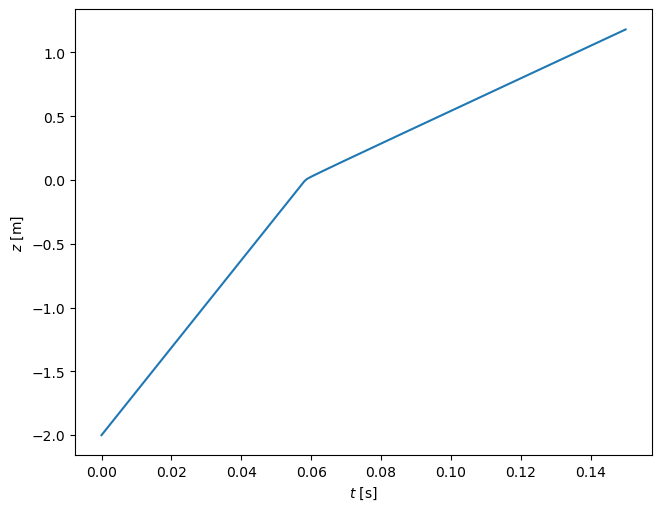

In [7]:
plt.figure(figsize=(6.5,5))
plt.plot(sol.t,sol.y[0])
plt.tight_layout()
plt.xlabel("$t$ [s]")
plt.ylabel("$z$ [m]")
#plt.savefig("pos-vs-tiempo.jpg", dpi=200, bbox_inches="tight")
plt.show()


12.75296546351841


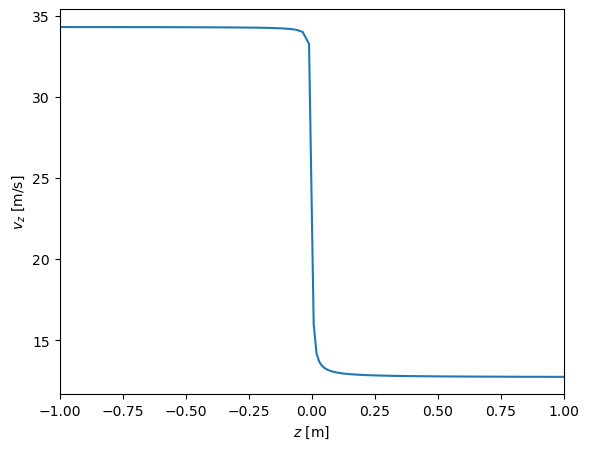

In [8]:
plt.figure(figsize=(6.5,5))
plt.xlim(-1,1)
plt.ylabel("$v_z$ [m/s]")
plt.xlabel("$z$ [m]" )
plt.plot(sol.y[0],sol.y[1])
print(min(sol.y[1]))
#plt.savefig("vel-vs-pos.jpg", dpi=200, bbox_inches="tight")

In [24]:

n = 4
vi = 34.3 #m/s velocidad inicial de la partícula en el eje z
ang = np.random.uniform(-0.001, 0.001, n) #Rango de angulos a considerar
vel = np.random.uniform(vi-2, vi+2, n) #Rango de velocidades
d = 1
t = np.linspace(0,0.09,200) #np.linspace(*t_span, 5000)  # Puntos de evaluación

soluciones = []
for theta in ang:
    for v0 in vel:
        v0_p = v0 * np.sin(theta*np.pi/180)
        v0_z = v0 * np.cos(theta*np.pi/180)

        
        #if v0_p>0:
        # Condiciones iniciales
        z0 = -d
        vz0 = v0_z
        rho0 = 0
        vrho0 = v0_p

        y0 = [z0, vz0, rho0, vrho0]

        sol = solve_ivp(sistema_diferencial, [min(t), max(t)], y0, t_eval=t, method='RK45',rtol=1e-8,atol=1e-12)
        soluciones.append(sol)
np.shape(soluciones)
#soluciones[0].y[1][0]

(16,)

In [25]:
#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')
import vapeplot
vapeplot.set_palette('vaporwave')

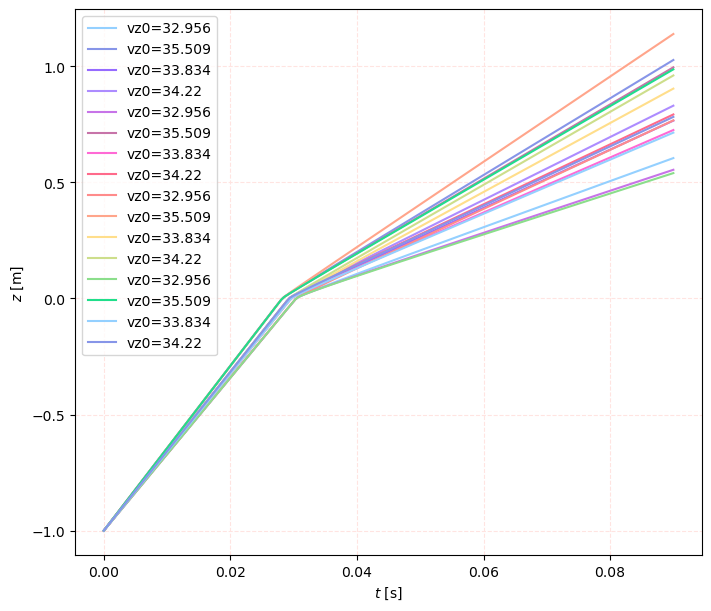

In [26]:
plt.figure(figsize=(7,6))

for i in range(0,16):
    plt.plot(soluciones[i].t, soluciones[i].y[0], label=f"vz0={round(soluciones[i].y[1][0],3)}")
    plt.legend()

plt.tight_layout()
#plt.ylim(0,38)
plt.ylabel("$z$ [m]")
plt.xlabel("$t$ [s]" )
plt.grid(color='mistyrose', linestyle='--')
#plt.savefig("z-vs-tiempo.jpg", dpi=200, bbox_inches="tight")
plt.show()


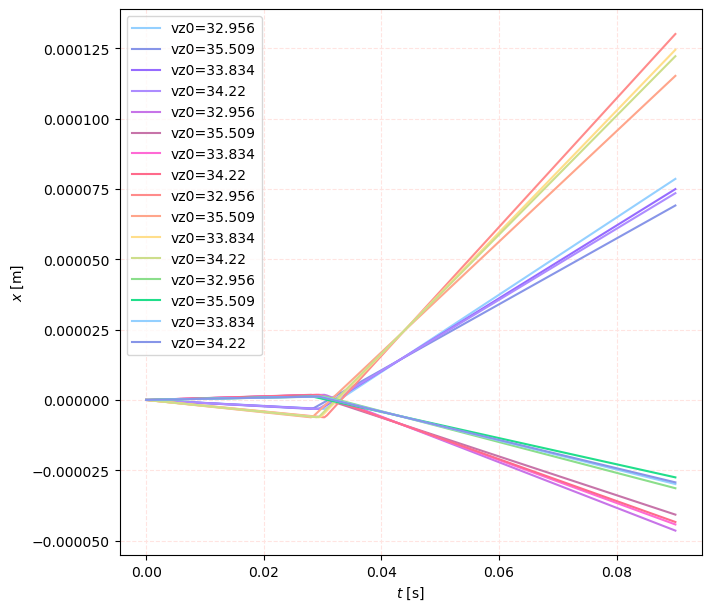

In [27]:
plt.figure(figsize=(7,6))

for i in range(0,16):
    plt.plot(soluciones[i].t, soluciones[i].y[2], label=f"vz0={round(soluciones[i].y[1][0],3)}")

plt.legend()
plt.tight_layout()
#plt.ylim(0,38)
plt.ylabel("$x$ [m]")
plt.xlabel("$t$ [s]" )
plt.grid(color='mistyrose', linestyle='--')
#plt.savefig("x-vs-tiempo.jpg", dpi=200, bbox_inches="tight")
plt.show()


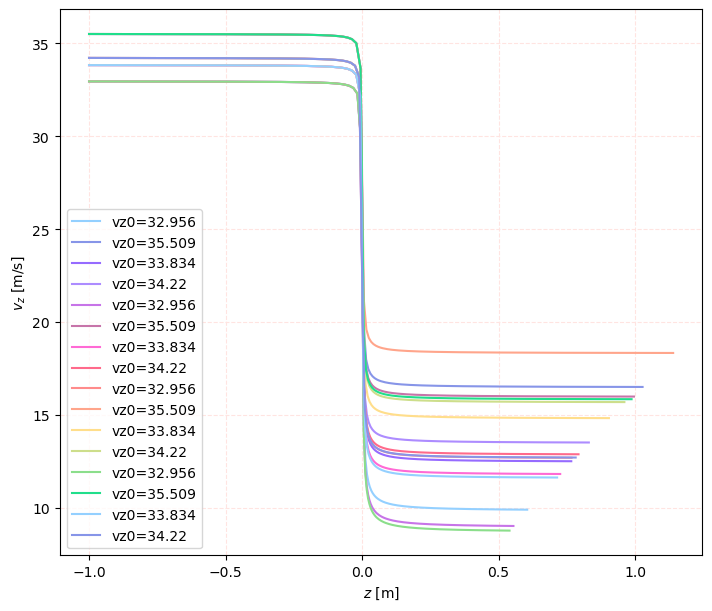

In [28]:
plt.figure(figsize=(7,6))
for i in range(0,16):
    plt.plot(soluciones[i].y[0], soluciones[i].y[1], label=f"vz0={round(soluciones[i].y[1][0],3)}")
    #print(min(soluciones[i].y[1]))

plt.legend()
plt.tight_layout()
#plt.ylim(0,38)
plt.ylabel("$v_z$ [m/s]")
plt.xlabel("$z$ [m]" )
plt.grid(color='mistyrose', linestyle='--')
#plt.savefig("velz-vs-z.jpg", dpi=200, bbox_inches="tight")
plt.show()


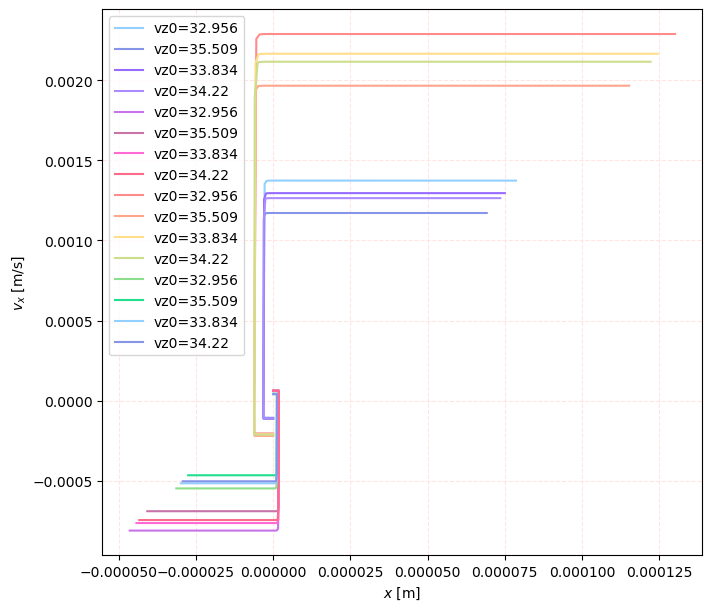

In [29]:
plt.figure(figsize=(7,6))

for i in range(0,16):
    plt.plot(soluciones[i].y[2], soluciones[i].y[3], label=f"vz0={round(soluciones[i].y[1][0],3)}")

plt.legend()
plt.tight_layout()
#plt.ylim(0,38)
plt.ylabel("$v_x$ [m/s]")
plt.xlabel("$x$ [m]" )
plt.grid(color='mistyrose', linestyle='--')
#plt.savefig("velx-vs-x.jpg", dpi=200, bbox_inches="tight")

plt.show()

In [30]:
# Mas cerca del foco

t = np.linspace(0,0.005,900)  #np.logspace(-3,-1.6,500)

soluciones = []
for theta in ang:
    for v0 in vel:
        v0_p = v0 * np.sin(theta*np.pi/180)
        v0_z = v0 * np.cos(theta*np.pi/180)
        
        #if v0_p>0:
        # Condiciones iniciales
        tau = (1 - 10*z_R)/v0_z
        z0 = -d + v0_z * tau
        vz0 = v0_z
        rho0 = 0 + v0_p * tau
        vrho0 = v0_p

        y0 = [z0, vz0, rho0, vrho0]
        sol = solve_ivp(sistema_diferencial, [min(t), max(t)], y0, t_eval=t, method='RK45',rtol=1e-8,atol=1e-12)
        soluciones.append(sol)

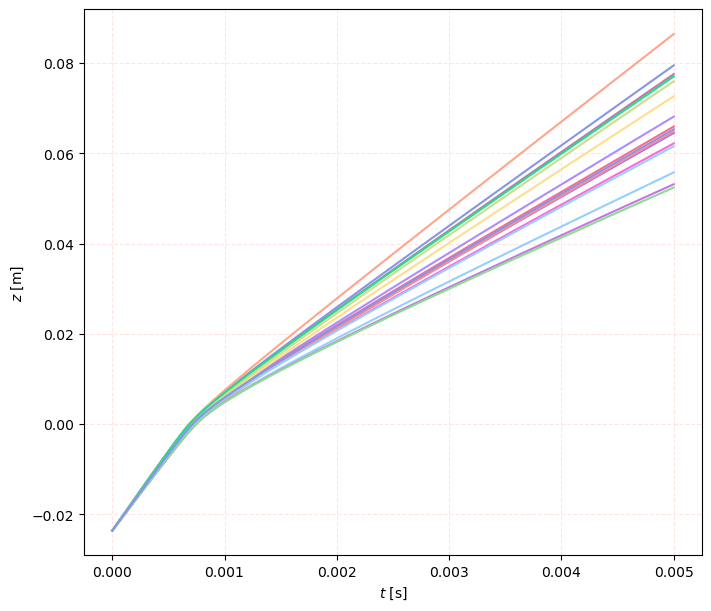

In [31]:
import vapeplot
vapeplot.set_palette('vaporwave')

plt.figure(figsize=(7,6))

for i in range(0,16):
    plt.plot(soluciones[i].t, soluciones[i].y[0])#, label=f"vz0={round(soluciones[i].y[1][0],3)}")
    #print(soluciones[i].y[0][0])
    #plt.legend()

plt.tight_layout()
#plt.ylim(-0.02,0.02)
#plt.xlim(0.001,0.003)
plt.ylabel("$z$ [m]")
plt.xlabel("$t$ [s]" )
plt.grid(color='mistyrose', linestyle='--')
#plt.savefig("z-vs-tiempo.jpg", dpi=200, bbox_inches="tight")
plt.show()


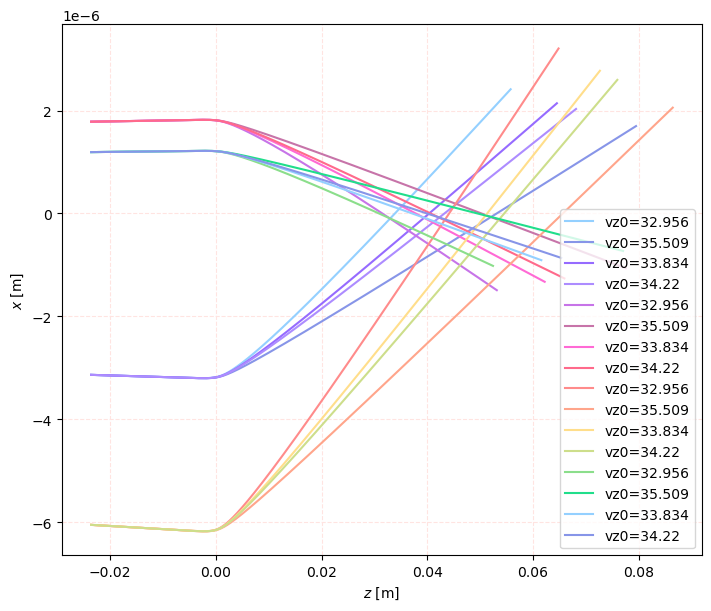

In [32]:
plt.figure(figsize=(7,6))
for i in range(0,16):
    plt.plot(soluciones[i].y[0], soluciones[i].y[2], label=f"vz0={round(soluciones[i].y[1][0],3)}")

plt.legend()
plt.tight_layout()
#plt.xlim(-0.1,0.1)
plt.ylabel("$x$ [m]")
plt.xlabel("$z$ [m]" )
plt.grid(color='mistyrose', linestyle='--')
#plt.savefig("x-vs-z-cerca.jpg", dpi=200, bbox_inches="tight")
plt.show()